In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


(150, 2)


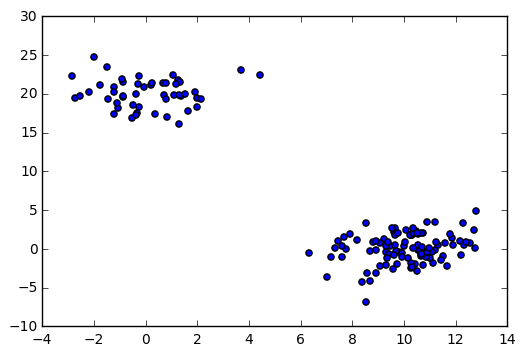

In [3]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print X.shape  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])

In [5]:
Z = linkage(X, 'ward')

In [9]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

dist = pdist(X)

print X.shape
print dist.shape

c, coph_dists = cophenet(Z, dist)
c

(150, 2)
(11175,)


0.98044225722692646

In [15]:
Z[50] # [idx1, idx2, dist, sample_count], algo decided to merge them, into size 2

array([ 101.     ,  147.     ,    0.41763,    2.     ])

In [17]:
print X[[101, 147]] # see? so similar!

[[ -2.74353  19.4356 ]
 [ -2.52616  19.79219]]


In [16]:
Z[-10] # algorithm is finishing =)

array([ 282.     ,  284.     ,    7.15692,   31.     ])

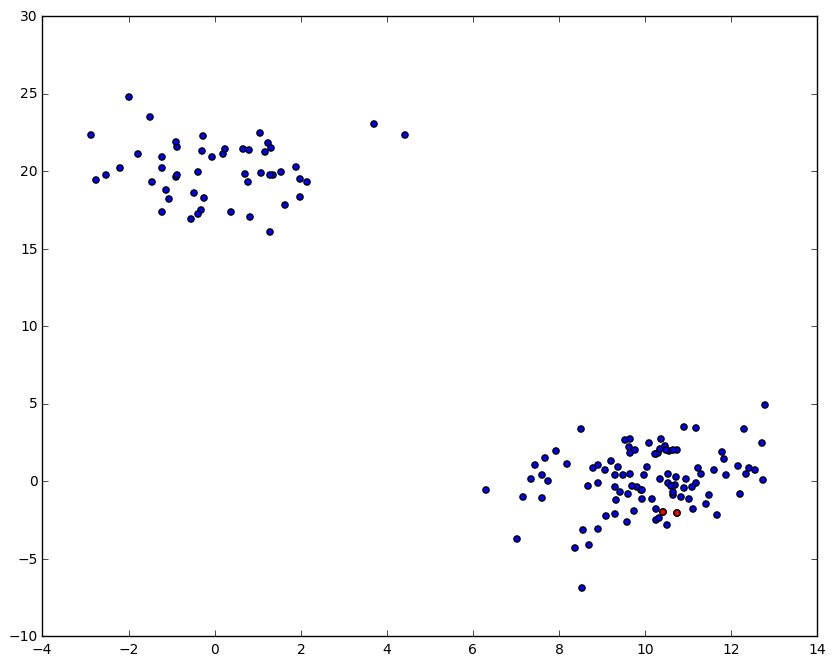

In [20]:
idxs = [33, 68]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')

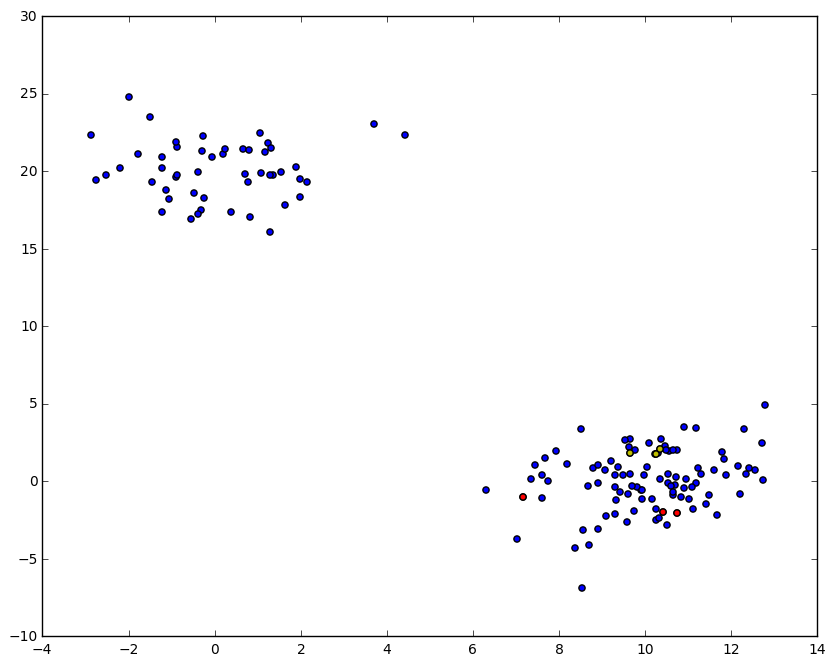

In [21]:
idxs = [33, 68, 62]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idxs,0], X[idxs,1], c='r')
idxs = [15, 69, 41]
plt.scatter(X[idxs,0], X[idxs,1], c='y')

done!


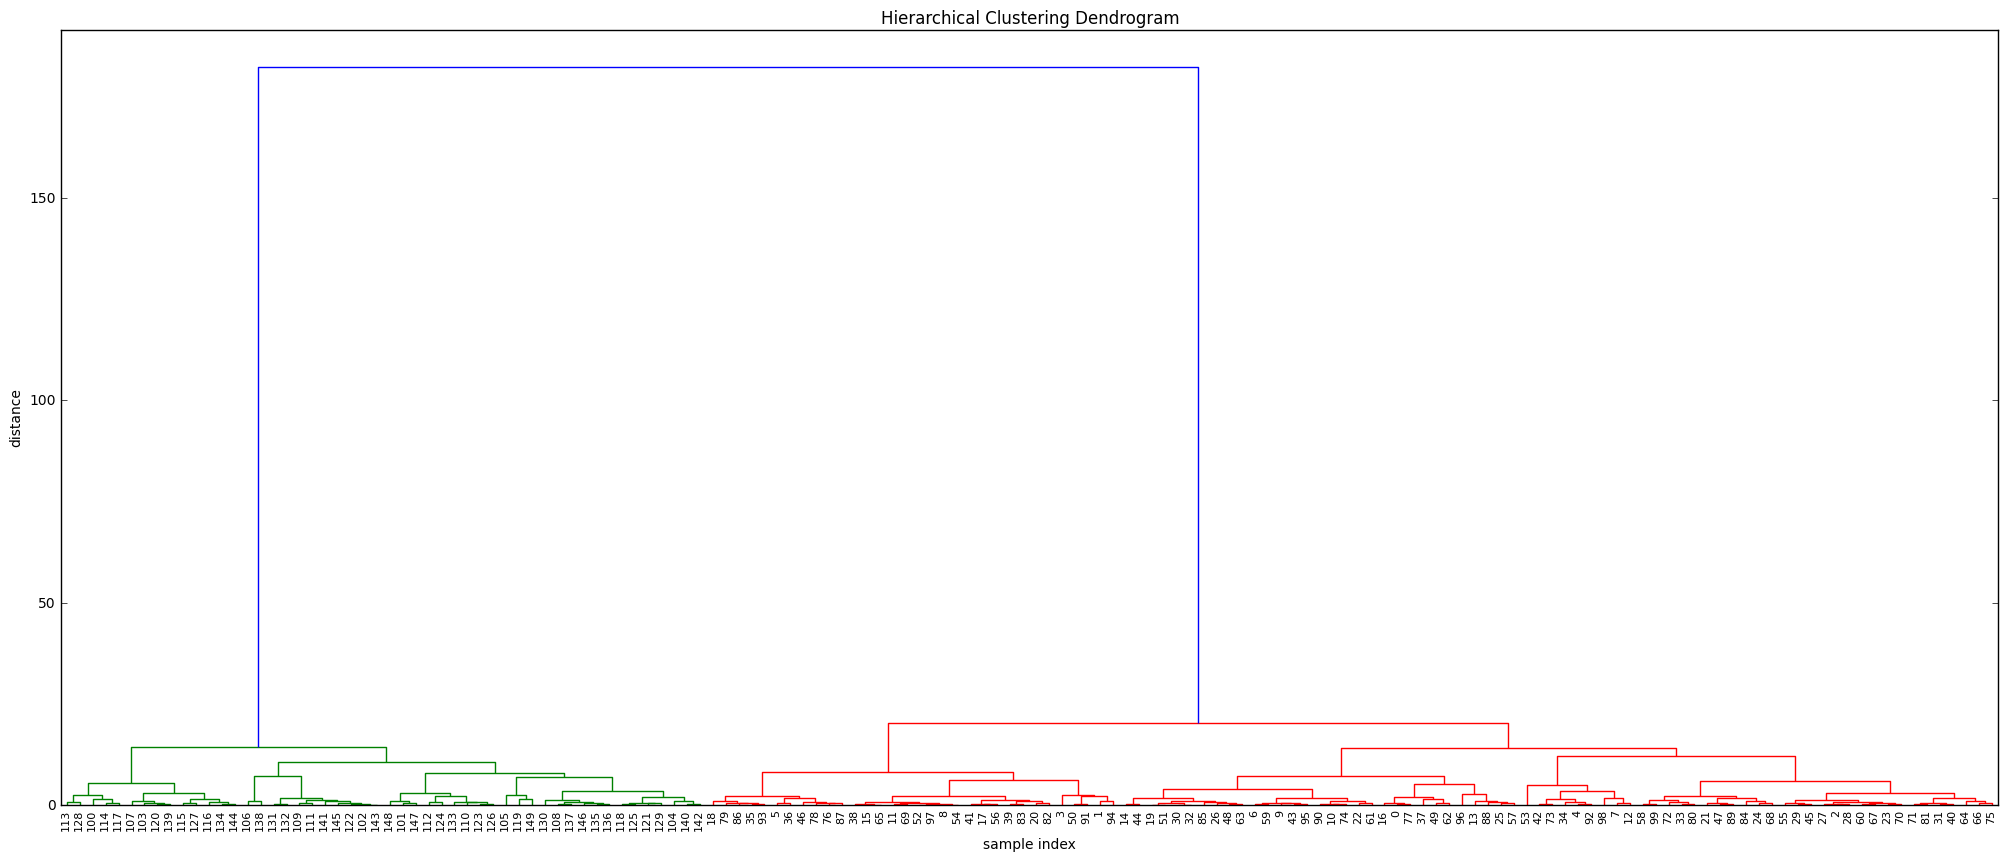

In [23]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
print "done!"

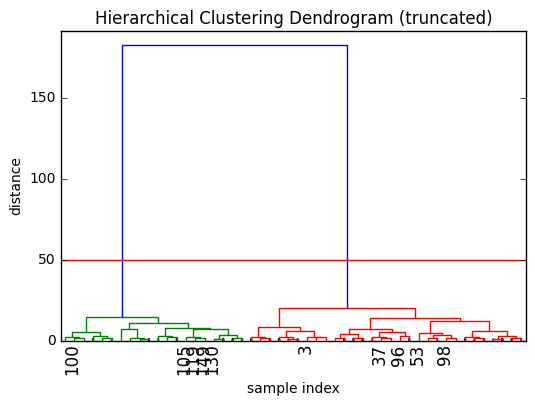

In [27]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.axhline(y=50, c='r')
plt.show()

In [28]:
## Notice that y is distance